In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()


Saving ICICIBANK_15min_FINAL.csv to ICICIBANK_15min_FINAL.csv


In [9]:
raw_data=pd.read_csv('https://drive.google.com/file/d/1ofC67YysDvcT22EMWyIkrwpqE_rHx37W/view?usp=drive_link')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 1941


In [10]:
uploaded

{'ICICIBANK_15min_FINAL.csv': b'Datetime,Open,High,Low,Close,Volume,EMA\n2021-04-26 09:15:00+05:30,339.25,346.35,339.25,345.35,7715118,0\n2021-04-26 09:30:00+05:30,345.5,346.5,345.0,345.05,3010818,0\n2021-04-26 09:45:00+05:30,345.1,346.25,345.0,345.9,2390991,0\n2021-04-26 10:00:00+05:30,345.85,346.35,344.25,344.5,2074132,0\n2021-04-26 10:15:00+05:30,344.45,345.2,344.05,345.1,1476206,0\n2021-04-26 10:30:00+05:30,345.15,346.7,344.35,346.0,2858358,0\n2021-04-26 10:45:00+05:30,345.95,346.2,345.1,345.7,1041426,0\n2021-04-26 11:00:00+05:30,345.8,347.35,345.65,346.5,2296107,0\n2021-04-26 11:15:00+05:30,346.55,347.0,345.9,345.9,1302639,0\n2021-04-26 11:30:00+05:30,346.05,346.95,345.7,346.55,1418870,0\n2021-04-26 11:45:00+05:30,346.55,346.8,345.55,346.4,1309190,0\n2021-04-26 12:00:00+05:30,346.5,346.55,345.7,346.35,1235179,0\n2021-04-26 12:15:00+05:30,346.35,346.7,345.4,345.9,1639284,0\n2021-04-26 12:30:00+05:30,345.95,345.95,345.0,345.3,1627619,0\n2021-04-26 12:45:00+05:30,345.3,345.9,345.15,3

In [12]:
raw_data = pd.read_csv('ICICIBANK_15min_FINAL.csv')

In [13]:
raw_data

,Datetime,Open,High,Low,Close,Volume,EMA
0,2021-04-26 09:15:00+05:30,339.25,346.35,339.25,345.35,7715118,0
1,2021-04-26 09:30:00+05:30,345.50,346.50,345.00,345.05,3010818,0
2,2021-04-26 09:45:00+05:30,345.10,346.25,345.00,345.90,2390991,0
3,2021-04-26 10:00:00+05:30,345.85,346.35,344.25,344.50,2074132,0
4,2021-04-26 10:15:00+05:30,344.45,345.20,344.05,345.10,1476206,0
...,...,...,...,...,...,...,...
3145,2021-10-25 14:15:00+05:30,508.55,510.00,506.90,508.90,1217344,0
3146,2021-10-25 14:30:00+05:30,508.90,509.30,506.50,506.95,994023,0
3147,2021-10-25 14:45:00+05:30,506.95,508.00,505.45,506.45,1098595,0
3148,2021-10-25 15:00:00+05:30,506.45,506.70,504.55,505.80,1601318,0


In [14]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [15]:
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [16]:
print(raw_data.shape)
raw_data.head()

(3150, 7)


,time,open,high,low,close,volume,EMA
0,2021-04-26 09:15:00,339.25,346.35,339.25,345.35,7715118,0
1,2021-04-26 09:30:00,345.50,346.50,345.00,345.05,3010818,0
2,2021-04-26 09:45:00,345.10,346.25,345.00,345.90,2390991,0
3,2021-04-26 10:00:00,345.85,346.35,344.25,344.50,2074132,0
4,2021-04-26 10:15:00,344.45,345.20,344.05,345.10,1476206,0


In [17]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

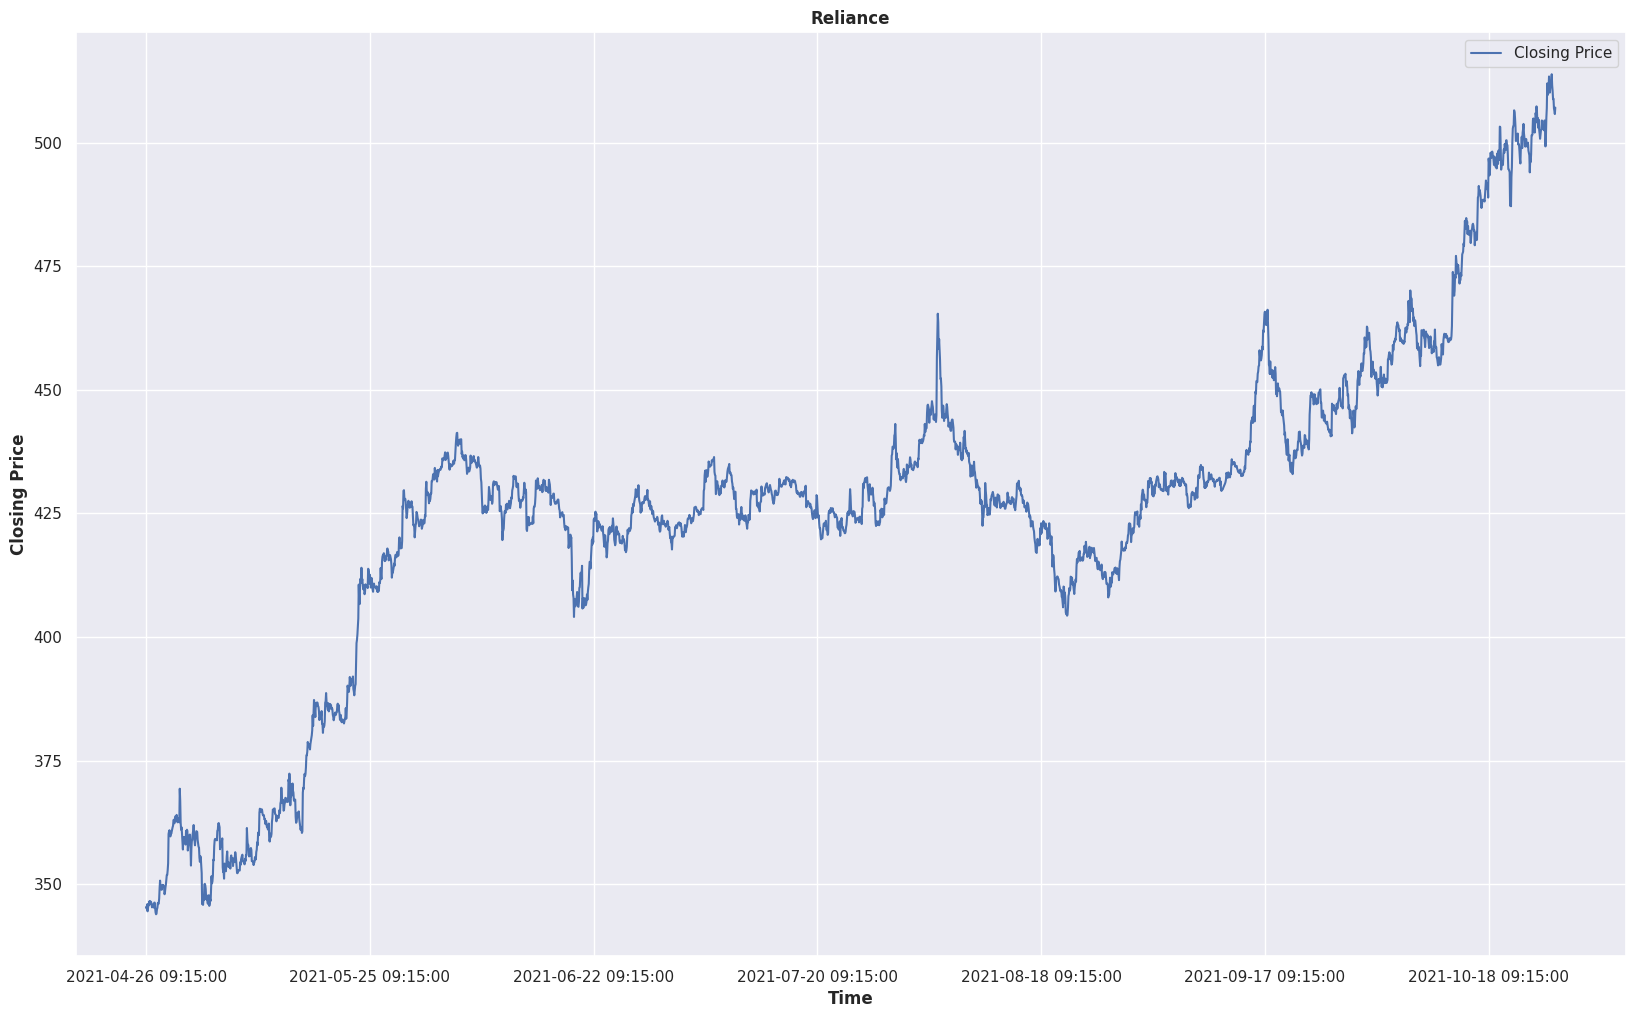

In [18]:
close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.title("Reliance", fontweight='bold')
plt.legend(['Closing Price'])

In [19]:
from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):

  time_format = "%Y-%m-%d %H:%M:%S"

  sum_pv = 0
  sum_volume = 0

  vwap = []

  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):

    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [20]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 3150
 Days 10 
 Length of prices 3150
 Length of EMA list 3140
len ema = 3140
len vwap = 3150


In [21]:
# make all ema, vwap, prices lists of equal length
price = price[-len(ema):]
vwap = vwap[-len(ema):]

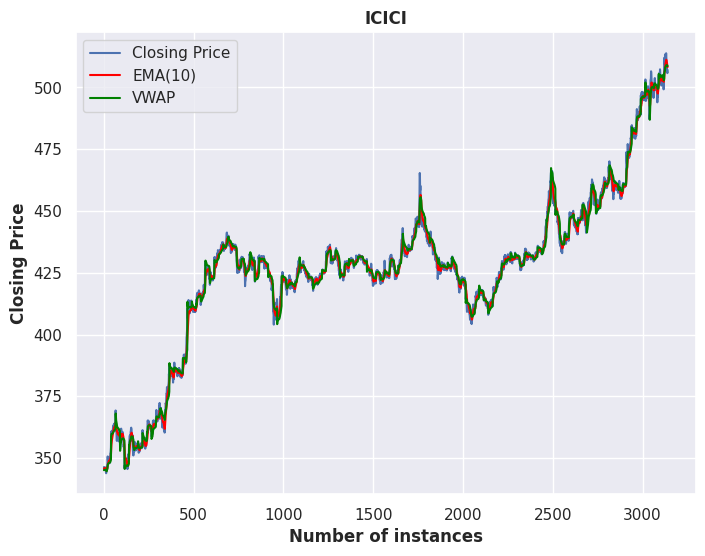

In [23]:
plt.figure(figsize=(8,6))
plt.title("ICICI", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [24]:
# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [25]:
ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[345.79045455 345.14752765 346.4       ]
 [345.89219008 345.19374295 346.35      ]
 [345.89361007 345.23814198 345.9       ]
 ...
 [509.1254661  508.91738114 506.45      ]
 [508.5208359  508.76229644 505.8       ]
 [508.2625021  508.65353714 507.1       ]]


In [26]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(3138, 3, 3) (3138,)
[[345.79045455 345.14752765 346.4       ]
 [345.89219008 345.19374295 346.35      ]
 [345.89361007 345.23814198 345.9       ]] 345.9


In [27]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(2196, 3, 3)
(2196,)
(942, 3, 3)
(942,)


In [28]:
X_test

array([[[421.05671759, 420.97966691, 421.05      ],
        [421.20095076, 421.04955004, 421.85      ],
        [421.39168698, 421.14520228, 422.25      ]],

       [[421.20095076, 421.04955004, 421.85      ],
        [421.39168698, 421.14520228, 422.25      ],
        [421.92956208, 421.46671351, 424.35      ]],

       [[421.39168698, 421.14520228, 422.25      ],
        [421.92956208, 421.46671351, 424.35      ],
        [422.53327806, 421.84283984, 425.25      ]],

       ...,

       [[510.33557282, 509.04652061, 508.9       ],
        [509.72001412, 508.99913394, 506.95      ],
        [509.1254661 , 508.91738114, 506.45      ]],

       [[509.72001412, 508.99913394, 506.95      ],
        [509.1254661 , 508.91738114, 506.45      ],
        [508.5208359 , 508.76229644, 505.8       ]],

       [[509.1254661 , 508.91738114, 506.45      ],
        [508.5208359 , 508.76229644, 505.8       ],
        [508.2625021 , 508.65353714, 507.1       ]]])

In [29]:
print(X_test)

[[[421.05671759 420.97966691 421.05      ]
  [421.20095076 421.04955004 421.85      ]
  [421.39168698 421.14520228 422.25      ]]

 [[421.20095076 421.04955004 421.85      ]
  [421.39168698 421.14520228 422.25      ]
  [421.92956208 421.46671351 424.35      ]]

 [[421.39168698 421.14520228 422.25      ]
  [421.92956208 421.46671351 424.35      ]
  [422.53327806 421.84283984 425.25      ]]

 ...

 [[510.33557282 509.04652061 508.9       ]
  [509.72001412 508.99913394 506.95      ]
  [509.1254661  508.91738114 506.45      ]]

 [[509.72001412 508.99913394 506.95      ]
  [509.1254661  508.91738114 506.45      ]
  [508.5208359  508.76229644 505.8       ]]

 [[509.1254661  508.91738114 506.45      ]
  [508.5208359  508.76229644 505.8       ]
  [508.2625021  508.65353714 507.1       ]]]


In [30]:
print(y_test)

[422.25 424.35 425.25 425.2  424.75 425.   425.1  425.4  422.75 423.4
 424.1  422.3  424.1  424.6  423.9  426.8  425.7  428.5  429.2  429.8
 429.5  427.8  428.8  427.85 427.6  427.75 427.5  426.25 427.7  427.15
 428.2  431.55 430.2  430.3  431.15 432.15 431.45 432.1  431.15 431.4
 429.3  428.65 430.5  428.45 429.65 428.9  429.45 430.85 430.55 431.5
 431.95 432.4  432.5  432.25 431.85 430.3  431.   430.85 430.45 429.85
 429.75 429.95 429.9  429.55 429.65 429.5  429.6  433.4  432.5  432.85
 433.15 430.5  429.55 430.35 429.8  429.35 428.8  430.2  430.55 430.4
 430.55 430.8  431.6  431.65 431.65 430.85 430.5  430.9  430.4  430.35
 431.75 430.65 433.15 432.3  432.   432.35 432.   431.45 431.4  431.2
 431.85 430.6  431.2  430.55 430.65 431.8  431.55 432.2  432.   432.
 431.25 431.45 431.25 430.85 430.65 430.95 430.8  428.7  428.85 428.25
 426.4  426.55 426.05 426.5  426.6  426.85 426.3  427.4  428.95 429.2
 429.35 429.2  428.7  429.   429.1  427.8  427.85 428.15 428.35 430.2
 428.85 428.15 4

In [31]:
# flattening input for model feeding

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [34]:
# Model training

from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_lstm_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 50)             10800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31051 (121.29 KB)
Trainable params: 31051 (121.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_bidirectional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               21600     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21701 (84.77 KB)
Trainable params: 21701 (84.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
69/69 - 2s - loss: 40880.5469 - val_loss: 6.2355 - 2s/epoch - 24ms/step
Epoch 2/50
69/69 - 0s - loss: 5.7796 - val_loss: 4.5479 - 257ms/epoch - 4ms/step
Epoch 3/50
69/69 - 0s - loss: 3.4735 - val_loss: 4.6005 - 252ms/epoch - 4ms/step
Epoch 4/50
69/69 - 0s - loss: 3.4750 - val_loss: 4.5512 - 251ms/epoch - 4ms/step
Epoch 5/50
69/69 - 0s - loss: 3.4614 - val_loss: 4.4630 - 248ms/epoch - 4ms/step
Epoch 6/50
69/69 - 0s - loss: 3.4709 - val_loss: 4.6378 - 248ms/epoch - 4ms/step
Epoch 7/50
69/69 - 0s - loss: 3.4634 - val_loss: 4.5612 - 253ms/epoch - 4ms/step
Epoch 8/50
69/69 - 0s - loss: 3.4641 - val_loss: 4.4809 - 252ms/epoch - 4ms/step
Epoch 9/50
69/69 - 0s - loss: 3.4889 - val_loss: 4.4439 - 249ms/epoch - 4ms/step
Epoch 10/50
69/69 - 0s - loss: 3.4474 - val_loss: 4.6131 - 256ms/epoch - 4ms/step
Epoch 11/50
69/69 - 0s - loss: 3.4397 - val_loss: 4.4302 - 253ms/epoch - 4ms/step
Epoch 12/50
69/69 - 0s - loss: 3.4281 - val_loss: 4.4031 - 256ms/epoch - 4ms/step
Epoch 13/50
69/69 - 0s 

In [38]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
69/69 - 3s - loss: 38911.5156 - val_loss: 4.2889 - 3s/epoch - 37ms/step
Epoch 2/50
69/69 - 0s - loss: 2.4200 - val_loss: 2.7132 - 348ms/epoch - 5ms/step
Epoch 3/50
69/69 - 0s - loss: 2.1072 - val_loss: 1.4484 - 354ms/epoch - 5ms/step
Epoch 4/50
69/69 - 0s - loss: 1.6483 - val_loss: 1.5932 - 339ms/epoch - 5ms/step
Epoch 5/50
69/69 - 0s - loss: 1.8505 - val_loss: 1.2418 - 345ms/epoch - 5ms/step
Epoch 6/50
69/69 - 0s - loss: 1.5072 - val_loss: 1.3142 - 352ms/epoch - 5ms/step
Epoch 7/50
69/69 - 0s - loss: 1.7026 - val_loss: 2.0666 - 350ms/epoch - 5ms/step
Epoch 8/50
69/69 - 0s - loss: 1.5353 - val_loss: 4.3837 - 346ms/epoch - 5ms/step
Epoch 9/50
69/69 - 0s - loss: 1.4930 - val_loss: 3.0522 - 338ms/epoch - 5ms/step
Epoch 10/50
69/69 - 0s - loss: 1.6909 - val_loss: 1.7584 - 341ms/epoch - 5ms/step
Epoch 11/50
69/69 - 0s - loss: 1.7273 - val_loss: 1.9075 - 340ms/epoch - 5ms/step
Epoch 12/50
69/69 - 0s - loss: 1.5858 - val_loss: 5.1085 - 323ms/epoch - 5ms/step
Epoch 13/50
69/69 - 0s 

In [39]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
69/69 - 3s - loss: 25054.9746 - val_loss: 10.6425 - 3s/epoch - 39ms/step
Epoch 2/50
69/69 - 0s - loss: 4.6333 - val_loss: 5.0966 - 293ms/epoch - 4ms/step
Epoch 3/50
69/69 - 0s - loss: 3.7380 - val_loss: 5.2961 - 293ms/epoch - 4ms/step
Epoch 4/50
69/69 - 0s - loss: 3.7689 - val_loss: 5.1051 - 289ms/epoch - 4ms/step
Epoch 5/50
69/69 - 0s - loss: 3.6914 - val_loss: 5.0607 - 283ms/epoch - 4ms/step
Epoch 6/50
69/69 - 0s - loss: 3.7112 - val_loss: 5.0354 - 281ms/epoch - 4ms/step
Epoch 7/50
69/69 - 0s - loss: 3.7335 - val_loss: 5.1949 - 281ms/epoch - 4ms/step
Epoch 8/50
69/69 - 0s - loss: 3.6837 - val_loss: 5.0060 - 284ms/epoch - 4ms/step
Epoch 9/50
69/69 - 0s - loss: 3.6423 - val_loss: 5.0184 - 281ms/epoch - 4ms/step
Epoch 10/50
69/69 - 0s - loss: 3.6348 - val_loss: 4.8871 - 283ms/epoch - 4ms/step
Epoch 11/50
69/69 - 0s - loss: 3.2852 - val_loss: 2.9792 - 283ms/epoch - 4ms/step
Epoch 12/50
69/69 - 0s - loss: 1.2710 - val_loss: 2.4283 - 268ms/epoch - 4ms/step
Epoch 13/50
69/69 - 0s

Text(0, 0.5, 'MSE')

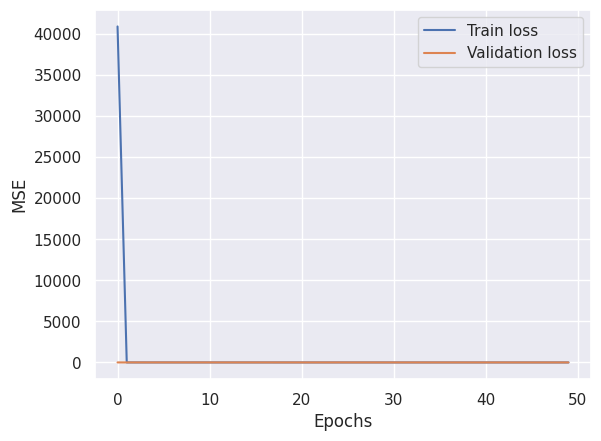

In [40]:
# plots
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

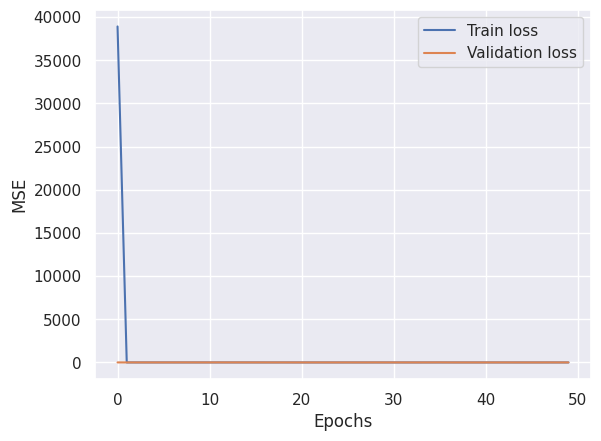

In [41]:
# plots
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

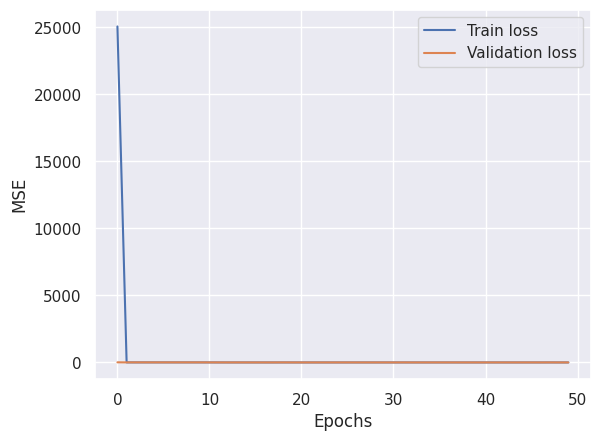

In [42]:
# plots
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [43]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

30/30 [==============================] - 0s 2ms/step
Train rmse for vanilla: 1.425569302626796
Test rmse for vanilla: 1.6641050888223379
30/30 [==============================] - 0s 2ms/step
Train rmse for stacked: 1.044884933012283
Test rmse for stacked: 1.338228224678475
30/30 [==============================] - 0s 2ms/step
Train rmse for bidirectional: 0.7642481260111933
Test rmse for bidirectional: 0.8360513255238431


In [44]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[422.25 424.35 425.25 425.2  424.75 425.   425.1  425.4  422.75 423.4 ]
[[421.49072]
 [422.25177]
 [423.0138 ]
 [424.22427]
 [424.67282]
 [424.59167]
 [424.44977]
 [424.6642 ]
 [424.37088]
 [424.0976 ]]


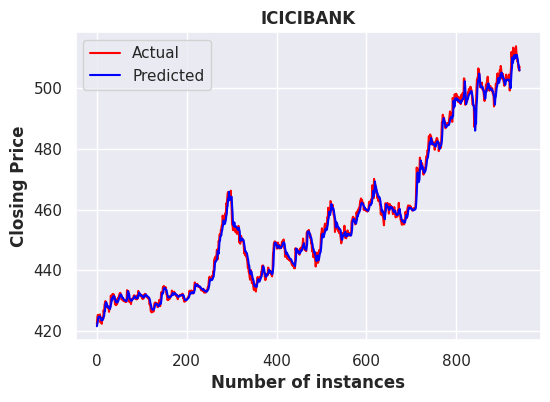

In [45]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

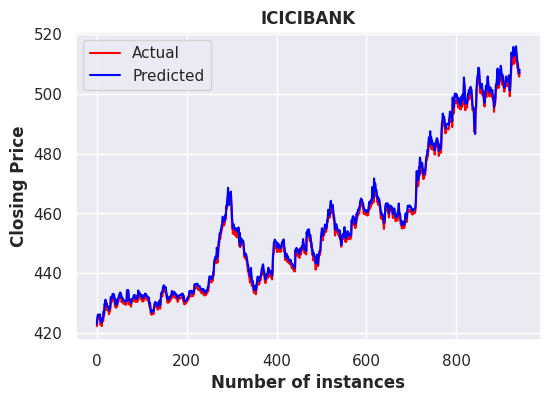

In [46]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

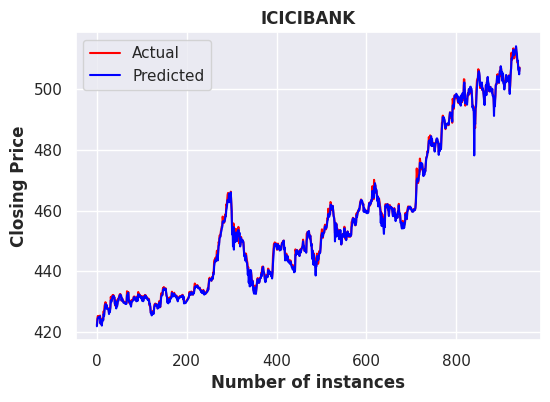

In [47]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])